In [1]:
import cleverhans
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data for exploitation (Saved in PTBDB_training_with_two_labels.ipynb)

In [14]:
X = np.array([np.load("X_test_for_exploitation.npy")])
y = np.array([np.load("y_test_for_exploitation.npy")])

In [15]:
X, y

(array([[1.        , 0.66217947, 0.16538462, 0.09198718, 0.0849359 ,
         0.04967949, 0.04166667, 0.01185897, 0.        , 0.0224359 ,
         0.00288462, 0.01666667, 0.00673077, 0.00448718, 0.02307692,
         0.02083333, 0.01634615, 0.01666667, 0.01730769, 0.02467949,
         0.01634615, 0.03076923, 0.0275641 , 0.0275641 , 0.03685898,
         0.03589744, 0.04455128, 0.04807692, 0.04519231, 0.06057692,
         0.05576923, 0.06538462, 0.06185897, 0.06217949, 0.08589744,
         0.06346154, 0.06634615, 0.07820513, 0.0698718 , 0.08173077,
         0.07884616, 0.10064103, 0.10064103, 0.08910257, 0.0974359 ,
         0.07692308, 0.08108974, 0.07339744, 0.06153846, 0.06474359,
         0.05897436, 0.06666667, 0.06282052, 0.06410257, 0.07339744,
         0.06923077, 0.08653846, 0.06634615, 0.06410257, 0.07852564,
         0.06634615, 0.06955128, 0.06282052, 0.05897436, 0.0698718 ,
         0.05192308, 0.06089744, 0.05480769, 0.05352564, 0.06089744,
         0.05384615, 0.05769231, 0

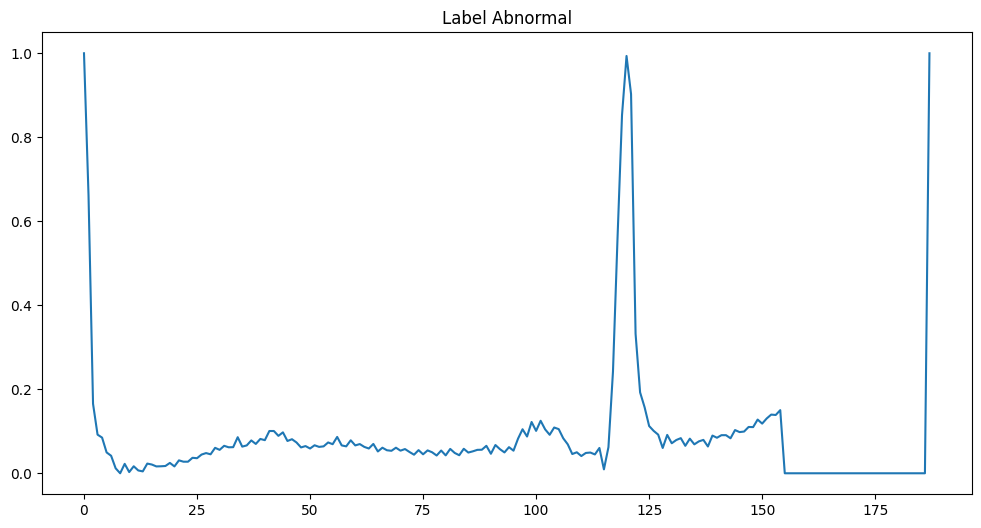

In [16]:
plt.figure(figsize = (12, 6))
plt.plot(X[0])
plt.title("Label Abnormal");

In [17]:
model = tf.keras.models.load_model("models/PTBDB_NN_V3.keras")

In [18]:
logits_only_model = tf.keras.Model(model.input, model.layers[-1].output)

### Non-Targeted 

1/1 [==============================] - 0s 47ms/step


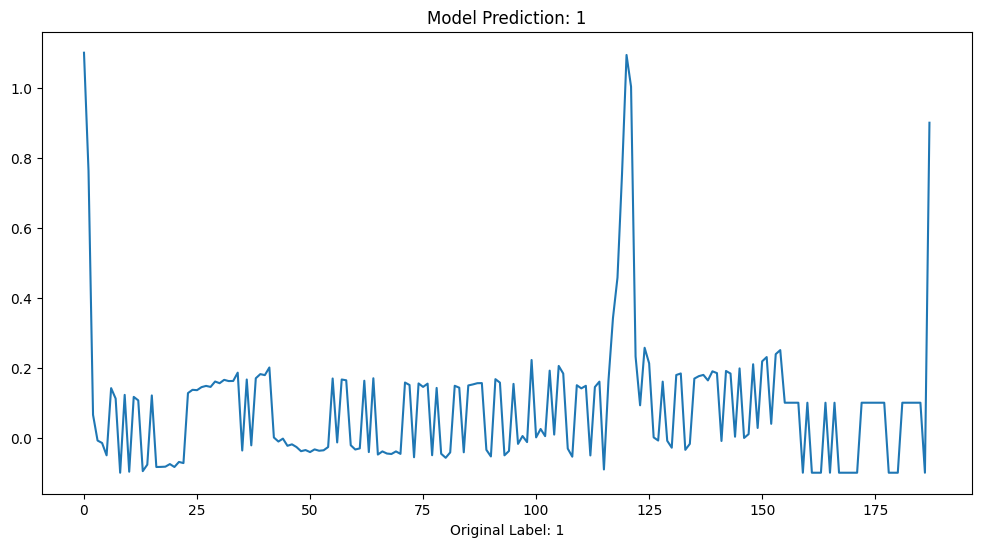

In [19]:
epsilon = 0.1
adv_example_untargeted_label = fast_gradient_method(logits_only_model, X, epsilon, np.inf, targeted=False)
adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

plt.figure(figsize = (12, 6))
plt.plot(adv_example_untargeted_label.numpy()[0])
plt.title("Model Prediction: {}".format(np.argmax(adv_example_untargeted_label_pred)))
plt.xlabel("Original Label: {}".format(1));

### Targeted

1/1 [==============================] - 0s 16ms/step


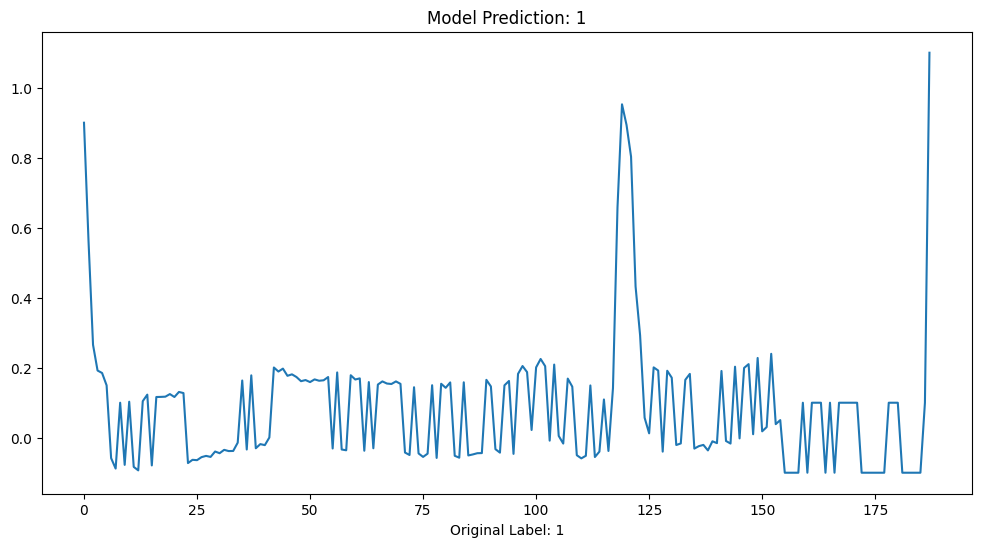

In [20]:
epsilon = 0.1
adv_example_untargeted_label = fast_gradient_method(logits_only_model, X, epsilon, np.inf, targeted=True)
adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

plt.figure(figsize = (12, 6))
plt.plot(adv_example_untargeted_label.numpy()[0])
plt.title("Model Prediction: {}".format(np.argmax(adv_example_untargeted_label_pred)))
plt.xlabel("Original Label: {}".format(1));